# Final Project 

In [1]:
import pandas as pd
import numpy as np

import sklearn

import scipy.stats as stats

from scipy.stats import shapiro

from sklearn.cluster import KMeans

import missingno as msno
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from sklearn.metrics import classification_report

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.svm import SVC

In [5]:
from sklearn.model_selection import GridSearchCV

In [6]:
%matplotlib inline

Reading the csv file with data from World Bank projects

In [7]:
df1 = pd.read_csv('data_wb.csv')

In [8]:
df1.columns

Index(['iati_identifier', 'title_narrative', 'title_narrative_lang',
       'title_xml', 'activity_status_code', 'activity_scope_code',
       'capital_spend_percentage', 'last_updated_datetime',
       'sector_vocabulary', 'participating_org_narrative_lang',
       'participating_org_narrative_text', 'reporting_org_ref',
       'participating_org_role', 'reporting_org_secondary_reporter',
       'participating_org_type', 'recipient_region_vocabulary',
       'description_type', 'recipient_region_percentage',
       'recipient_region_xml', 'sector_narrative',
       'participating_org_narrative', 'description_lang',
       'recipient_region_code', 'sector_narrative_text',
       'reporting_org_narrative', 'sector_code', 'description_narrative_text',
       'reporting_org_xml', 'reporting_org_type_code', 'description_xml',
       'sector_xml', 'description_narrative', 'sector_percentage',
       'participating_org_ref', 'sector_narrative_lang',
       'recipient_region_vocabulary_uri', 

In [9]:
df2 = df1[['iati_identifier','title_narrative','activity_status_code', 'activity_scope_code','sector_code', 
     'reporting_org_type_name', 'budget_value_usd_sum', 'recipient_country_name', 'recipient_country_percentage', 'recipient_region_code']]

In [10]:
df2.head()

,iati_identifier,title_narrative,activity_status_code,activity_scope_code,sector_code,reporting_org_type_name,budget_value_usd_sum,recipient_country_name,recipient_country_percentage,recipient_region_code
0,XI-IATI-WBTF-TF070850,Australian Trust Fund for Solomon Islands Rura...,2,4.0,"73010,43042,43040,32161,31193,31191,31163,3113...",Multilateral,21300075.00,Solomon Islands,NaN,NaN
1,XM-DAC-21-1-2018007243B1ZAMOP1POL-ZAMOP1PII,2018 Funding: Promote land ownership for commu...,4,NaN,NaN,Government,NaN,Zambia,NaN,NaN
2,ES-DIR3-E04585801-009-031721,PROYECTO: Mejora de condiciones económicas de ...,3,NaN,43040,Government,19190.51,Ghana,100.0,289
3,ES-DIR3-E04585801-009-002077,FORTALEC. DEL DESAR. INTEGRAL LOCAL MEDIANTE A...,3,NaN,"41010,43040,16050",Government,68968.65,Morocco,99.0,189
4,ES-DIR3-E04585801-009-001991,DIVERSIFICACIÓN DE LAS FUENTES DE INGRESO Y ES...,3,NaN,43040,Government,46963.25,Morocco,100.0,189


In [11]:
df2.shape

(7819, 10)

## Data cleaning 

<AxesSubplot:>

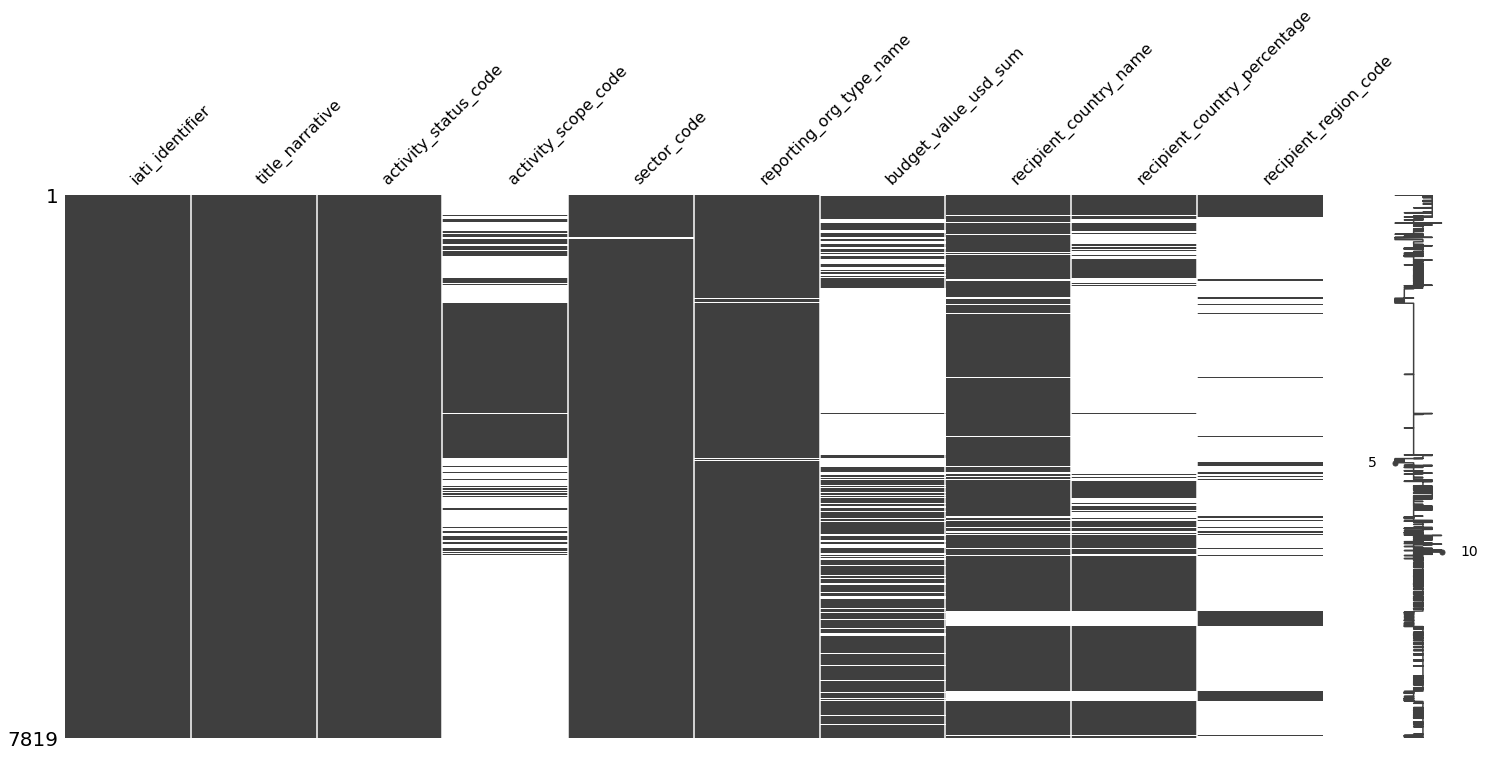

In [13]:
msno.matrix(df2)

In [14]:
df2 = df1[['iati_identifier','title_narrative','activity_status_code','sector_code', 
     'reporting_org_type_name', 'budget_value_usd_sum', 'recipient_country_name', 'recipient_country_percentage', 'recipient_region_code']]

<ipython-input-15-319b85221014>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(axis=0,inplace=True, subset=['budget_value_usd_sum', 'recipient_country_name', 'recipient_country_percentage'])


<AxesSubplot:>

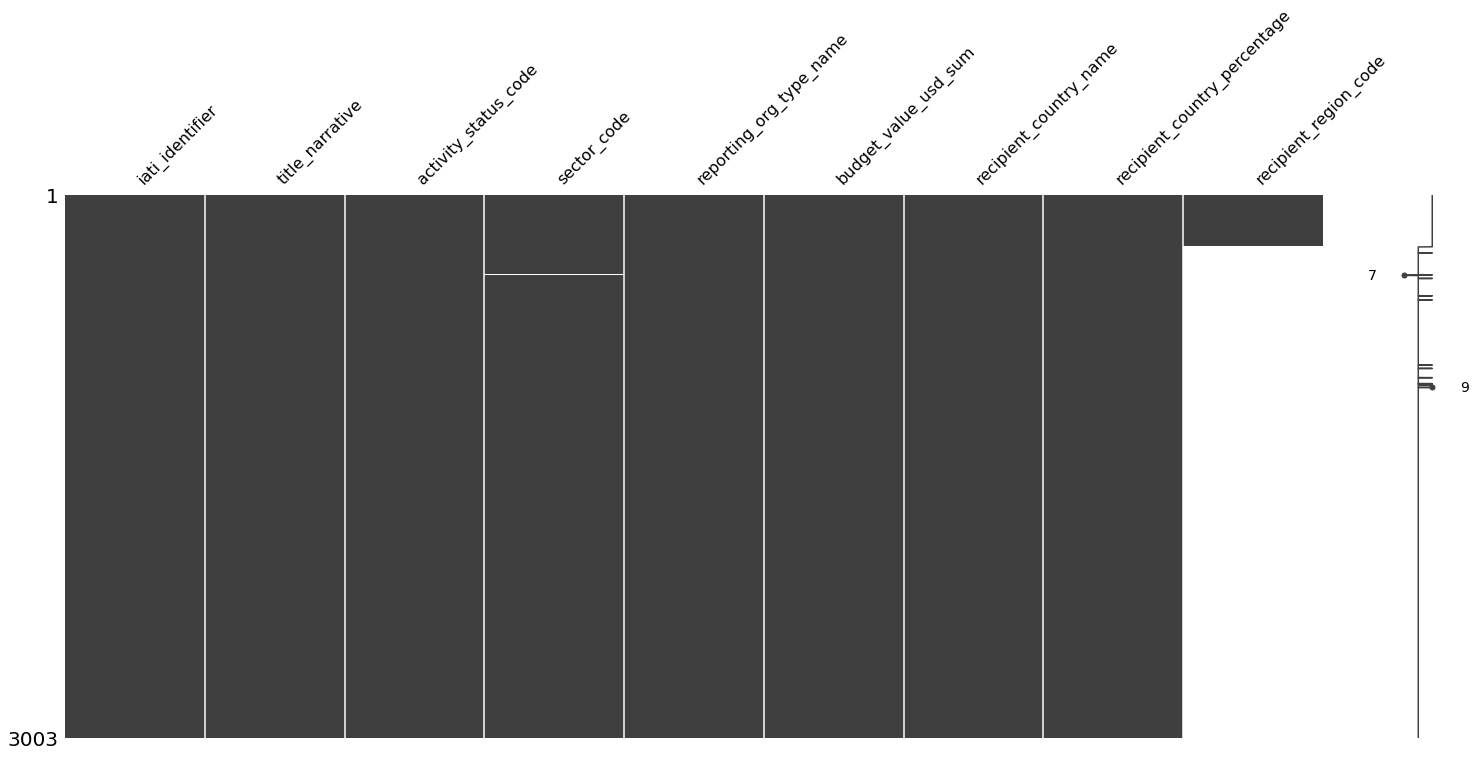

In [15]:
df2.dropna(axis=0,inplace=True, subset=['budget_value_usd_sum', 'recipient_country_name', 'recipient_country_percentage'])
msno.matrix(df2)

In [16]:
df2.shape

(3003, 9)

In [17]:
df2.drop(columns=["recipient_region_code"], inplace= True)

C:\Users\HP\Anaconda3\envs\dataanalyticspython\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [18]:
df2.dropna(axis=0,subset=['sector_code'], inplace=True)

<ipython-input-18-02aa3c8458e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(axis=0,subset=['sector_code'], inplace=True)


<AxesSubplot:>

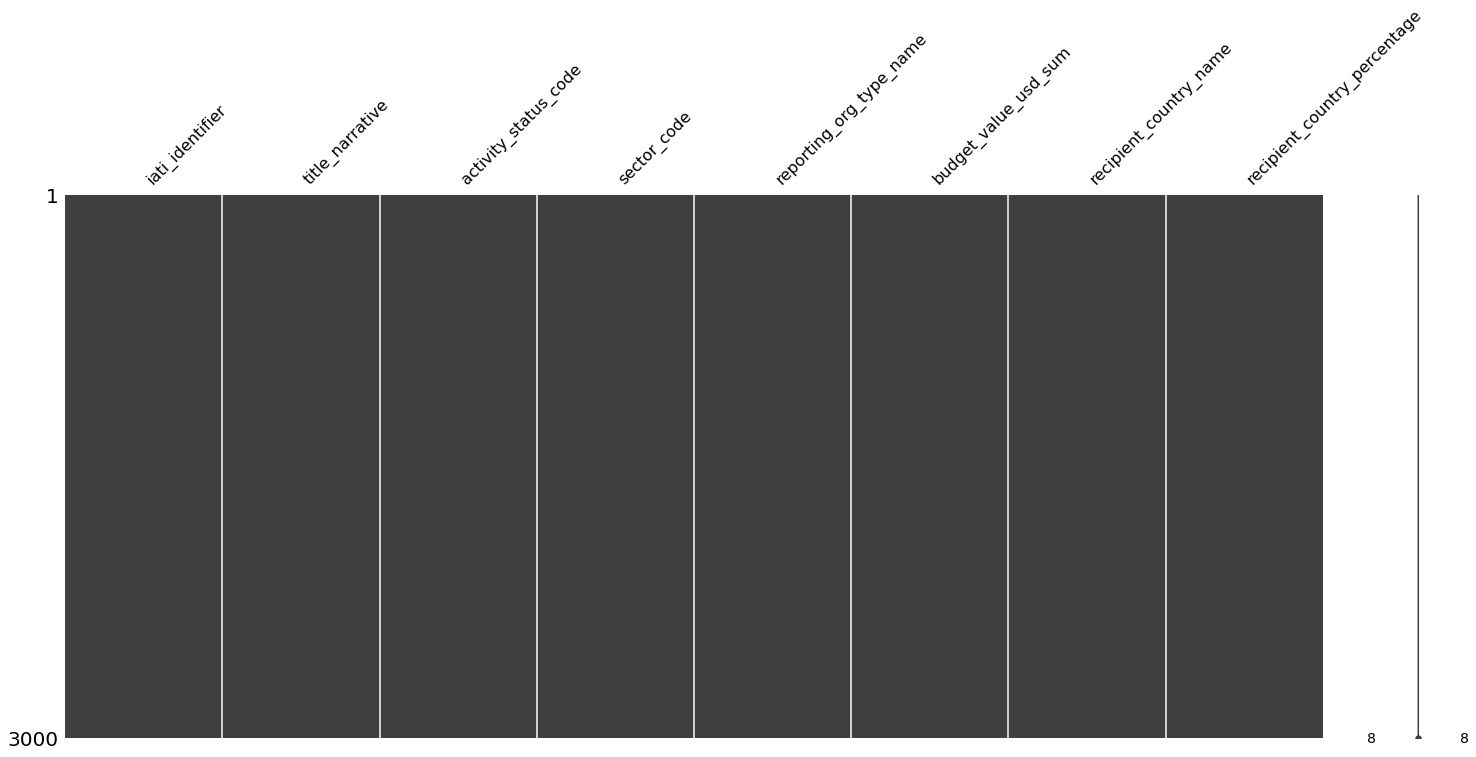

In [19]:
msno.matrix(df2)

In [20]:
df2.shape

(3000, 8)

,iati_identifier,title_narrative,activity_status_code,sector_code,reporting_org_type_name,budget_value_usd_sum,recipient_country_name,recipient_country_percentage
2,ES-DIR3-E04585801-009-031721,PROYECTO: Mejora de condiciones económicas de ...,3,43040,Government,19190.51,Ghana,100.0
3,ES-DIR3-E04585801-009-002077,FORTALEC. DEL DESAR. INTEGRAL LOCAL MEDIANTE A...,3,"41010,43040,16050",Government,68968.65,Morocco,99.0
4,ES-DIR3-E04585801-009-001991,DIVERSIFICACIÓN DE LAS FUENTES DE INGRESO Y ES...,3,43040,Government,46963.25,Morocco,100.0
5,ES-DIR3-E04585801-009-002079,APOYO AL DESARROLLO INTEGRAL DE LAS COMUNIDADE...,3,43040,Government,71340.62,Morocco,100.0
6,ES-DIR3-E04585801-009-041829,Fortalecimiento del desarrollo integral local ...,3,43040,Government,55382.05,Morocco,100.0


In [23]:
df2.to_csv('world_bank_data_1.csv', index= False)

In [24]:
df3 = pd.read_csv('world_bank_data_1.csv')
df3.head()

,iati_identifier,title_narrative,activity_status_code,sector_code,reporting_org_type_name,budget_value_usd_sum,recipient_country_name,recipient_country_percentage
0,ES-DIR3-E04585801-009-031721,PROYECTO: Mejora de condiciones económicas de ...,3,43040,Government,19190.51,Ghana,100.0
1,ES-DIR3-E04585801-009-002077,FORTALEC. DEL DESAR. INTEGRAL LOCAL MEDIANTE A...,3,"41010,43040,16050",Government,68968.65,Morocco,99.0
2,ES-DIR3-E04585801-009-001991,DIVERSIFICACIÓN DE LAS FUENTES DE INGRESO Y ES...,3,43040,Government,46963.25,Morocco,100.0
3,ES-DIR3-E04585801-009-002079,APOYO AL DESARROLLO INTEGRAL DE LAS COMUNIDADE...,3,43040,Government,71340.62,Morocco,100.0
4,ES-DIR3-E04585801-009-041829,Fortalecimiento del desarrollo integral local ...,3,43040,Government,55382.05,Morocco,100.0


## ANOVA test

First, we would like to know which are the most common organization types for these projects 

In [18]:
df2.reporting_org_type_name.unique()

array(['Government', 'Multilateral', 'Private Sector',
       'International NGO', 'National NGO', 'Other Public Sector',
       'Foundation'], dtype=object)

In [19]:
df2.groupby(by=['reporting_org_type_name'])['iati_identifier'].count()

reporting_org_type_name
Foundation                2
Government             2795
International NGO        18
Multilateral            151
National NGO             15
Other Public Sector       9
Private Sector           10
Name: iati_identifier, dtype: int64

As we can observe, the most common organizations are Government, Multilateral, International NGO, and National NGO. it is interesting to note if they come from the same population

In [20]:
Government = df2[df2['reporting_org_type_name'] == 'Government']['budget_value_usd_sum'].values

In [21]:
Multilateral = df2[df2['reporting_org_type_name'] == 'Multilateral']['budget_value_usd_sum'].values

In [22]:
International = df2[df2['reporting_org_type_name'] == 'International NGO']['budget_value_usd_sum'].values

In [23]:
National = df2[df2['reporting_org_type_name'] == 'National NGO']['budget_value_usd_sum'].values

In [24]:
mg = np.mean(Government)

mm = np.mean(Multilateral)

mi = np.mean(International)

mn = np.mean(National)

To perform one way ANOVA test the following assumptions must be considered:
1. The samples are independent.
2. Each sample is from a normally distributed population.
3. The population standard deviations of the groups are all equal.  This
   property is known as homoscedasticity.

In [29]:
shapiro(Government)

ShapiroResult(statistic=0.2896985411643982, pvalue=0.0)

In [30]:
shapiro(Multilateral)

ShapiroResult(statistic=0.6246447563171387, pvalue=4.82564430782003e-18)

In [31]:
shapiro(International)

ShapiroResult(statistic=0.41590720415115356, pvalue=1.6185269657853496e-07)

In [32]:
shapiro(National)

ShapiroResult(statistic=0.80082768201828, pvalue=0.0037673553451895714)

In [33]:
stats.f_oneway(Government, Multilateral, International, National)

F_onewayResult(statistic=442.89224575763285, pvalue=7.232836505573012e-238)

## K means clustering 

In [34]:
df2.head()

,iati_identifier,title_narrative,activity_status_code,sector_code,reporting_org_type_name,budget_value_usd_sum,recipient_country_name,recipient_country_percentage
2,ES-DIR3-E04585801-009-031721,PROYECTO: Mejora de condiciones económicas de ...,3,43040,Government,19190.51,Ghana,100.0
3,ES-DIR3-E04585801-009-002077,FORTALEC. DEL DESAR. INTEGRAL LOCAL MEDIANTE A...,3,"41010,43040,16050",Government,68968.65,Morocco,99.0
4,ES-DIR3-E04585801-009-001991,DIVERSIFICACIÓN DE LAS FUENTES DE INGRESO Y ES...,3,43040,Government,46963.25,Morocco,100.0
5,ES-DIR3-E04585801-009-002079,APOYO AL DESARROLLO INTEGRAL DE LAS COMUNIDADE...,3,43040,Government,71340.62,Morocco,100.0
6,ES-DIR3-E04585801-009-041829,Fortalecimiento del desarrollo integral local ...,3,43040,Government,55382.05,Morocco,100.0


In [35]:
cleaned = df2.set_index('iati_identifier').sector_code.str.split(',', expand=True).stack()

In [36]:
cleaned

iati_identifier                  
ES-DIR3-E04585801-009-031721    0    43040
ES-DIR3-E04585801-009-002077    0    41010
                                1    43040
                                2    16050
ES-DIR3-E04585801-009-001991    0    43040
                                     ...  
SE-0-SE-6-7400054101-HND-43040  1    43040
SE-0-SE-6-7400259101-HND-43040  0      430
                                1    43040
SE-0-SE-6-7400289701-HND-43040  0      430
                                1    43040
Length: 8560, dtype: object

In [37]:
kmeans_data = pd.get_dummies(cleaned, prefix='dummy').groupby(level=0).sum()

In [38]:
kmeans_data.head()

,dummy_000011,dummy_000014,dummy_000021,dummy_000022,dummy_000023,dummy_000024,dummy_000025,dummy_000026,dummy_000031,dummy_000032,...,dummy_wa,dummy_wc,dummy_wf,dummy_wz,dummy_ya,dummy_yf,dummy_yh,dummy_yt,dummy_yy,dummy_yz
iati_identifier,,,,,,,,,,,,,,,,,,,,,
44000-P040653,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
44000-P065129,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
44000-P071144,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44000-P073886,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
44000-P074011,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(kmeans_data)

In [40]:
kmeans.labels_

array([6, 6, 8, ..., 4, 4, 4])

In [41]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 3000,
    "random_state": 42,
    }

# A list holds the SSE values for each k

sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(kmeans_data)
    sse.append(kmeans.inertia_)

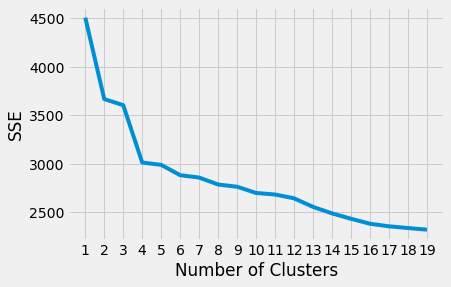

In [42]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 20), sse)
#plt.figure(figsize=(10, 10))
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

One insight from this journey is that this real database is available to cluster all the project categories using four clusters

##  Code for Activity Status

1	Pipeline/identification	The activity is being scoped or planned

2	Implementation	        The activity is currently being implemented

3	Finalisation	        Physical activity is complete or the final disbursement has been made, but the activity remains open pending financial sign off or M&E

4	Closed	                Physical activity is complete or the final disbursement has been made.

5	Cancelled	            The activity has been cancelled

6	Suspended	            The activity has been temporarily suspended

In [43]:
df3 = pd.read_csv('data_wb.csv')


In [44]:
df3.dropna(axis = 0, subset= ['sector_code', 'reporting_org_type_name'], inplace=True)
df3.head()

,iati_identifier,title_narrative,title_narrative_lang,title_xml,activity_status_code,activity_scope_code,capital_spend_percentage,last_updated_datetime,sector_vocabulary,participating_org_narrative_lang,...,recipient_country_xml,recipient_country_name,recipient_country_percentage,recipient_country_code,recipient_region_narrative,recipient_region_narrative_lang,recipient_region_narrative_text,recipient_country_narrative,recipient_country_narrative_text,recipient_country_narrative_lang
0,XI-IATI-WBTF-TF070850,Australian Trust Fund for Solomon Islands Rura...,en,<title><narrative>Australian Trust Fund for So...,2,4.0,NaN,2021-03-12T02:15:23Z,"1,1,1,1,1,1,1,1,1,1","en,en",...,"<recipient-country code=""SB""><narrative>SOLOMO...",Solomon Islands,NaN,SB,NaN,NaN,NaN,SOLOMON ISLANDS,SOLOMON ISLANDS,en
2,ES-DIR3-E04585801-009-031721,PROYECTO: Mejora de condiciones económicas de ...,es,<title><narrative>PROYECTO: Mejora de condicio...,3,NaN,NaN,NaN,1,"en,en,en,en,en",...,"<recipient-country code=""GH"" percentage=""100"" />",Ghana,100.0,GH,NaN,NaN,NaN,NaN,NaN,NaN
3,ES-DIR3-E04585801-009-002077,FORTALEC. DEL DESAR. INTEGRAL LOCAL MEDIANTE A...,es,<title><narrative>FORTALEC. DEL DESAR. INTEGRA...,3,NaN,NaN,NaN,"1,1,1","en,en,en,en",...,"<recipient-country code=""MA"" percentage=""99"" />",Morocco,99.0,MA,NaN,NaN,NaN,NaN,NaN,NaN
4,ES-DIR3-E04585801-009-001991,DIVERSIFICACIÓN DE LAS FUENTES DE INGRESO Y ES...,es,<title><narrative>DIVERSIFICACI&#211;N DE LAS ...,3,NaN,NaN,NaN,1,"en,en,en,en",...,"<recipient-country code=""MA"" percentage=""100"" />",Morocco,100.0,MA,NaN,NaN,NaN,NaN,NaN,NaN
5,ES-DIR3-E04585801-009-002079,APOYO AL DESARROLLO INTEGRAL DE LAS COMUNIDADE...,es,<title><narrative>APOYO AL DESARROLLO INTEGRAL...,3,NaN,NaN,NaN,1,"en,en,en,en",...,"<recipient-country code=""MA"" percentage=""100"" />",Morocco,100.0,MA,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df3.columns

Index(['iati_identifier', 'title_narrative', 'title_narrative_lang',
       'title_xml', 'activity_status_code', 'activity_scope_code',
       'capital_spend_percentage', 'last_updated_datetime',
       'sector_vocabulary', 'participating_org_narrative_lang',
       'participating_org_narrative_text', 'reporting_org_ref',
       'participating_org_role', 'reporting_org_secondary_reporter',
       'participating_org_type', 'recipient_region_vocabulary',
       'description_type', 'recipient_region_percentage',
       'recipient_region_xml', 'sector_narrative',
       'participating_org_narrative', 'description_lang',
       'recipient_region_code', 'sector_narrative_text',
       'reporting_org_narrative', 'sector_code', 'description_narrative_text',
       'reporting_org_xml', 'reporting_org_type_code', 'description_xml',
       'sector_xml', 'description_narrative', 'sector_percentage',
       'participating_org_ref', 'sector_narrative_lang',
       'recipient_region_vocabulary_uri', 

In [46]:
df3 = df3[['iati_identifier','title_narrative','activity_status_code','sector_code','reporting_org_type_name','recipient_country_name','budget_value_usd_sum']]

<AxesSubplot:>

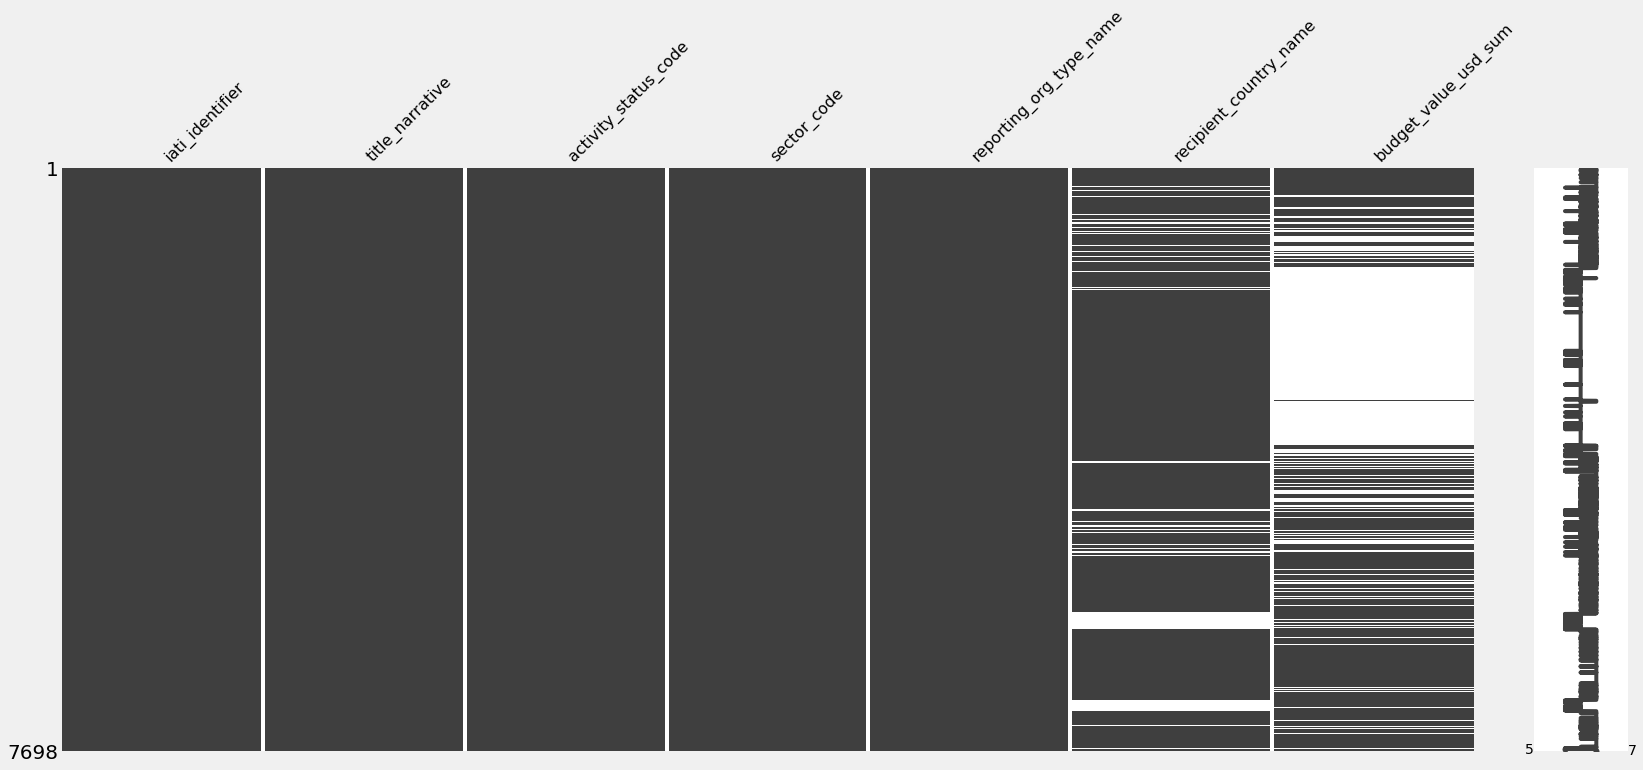

In [47]:
msno.matrix(df3)

In [48]:
df3.shape

(7698, 7)

<AxesSubplot:>

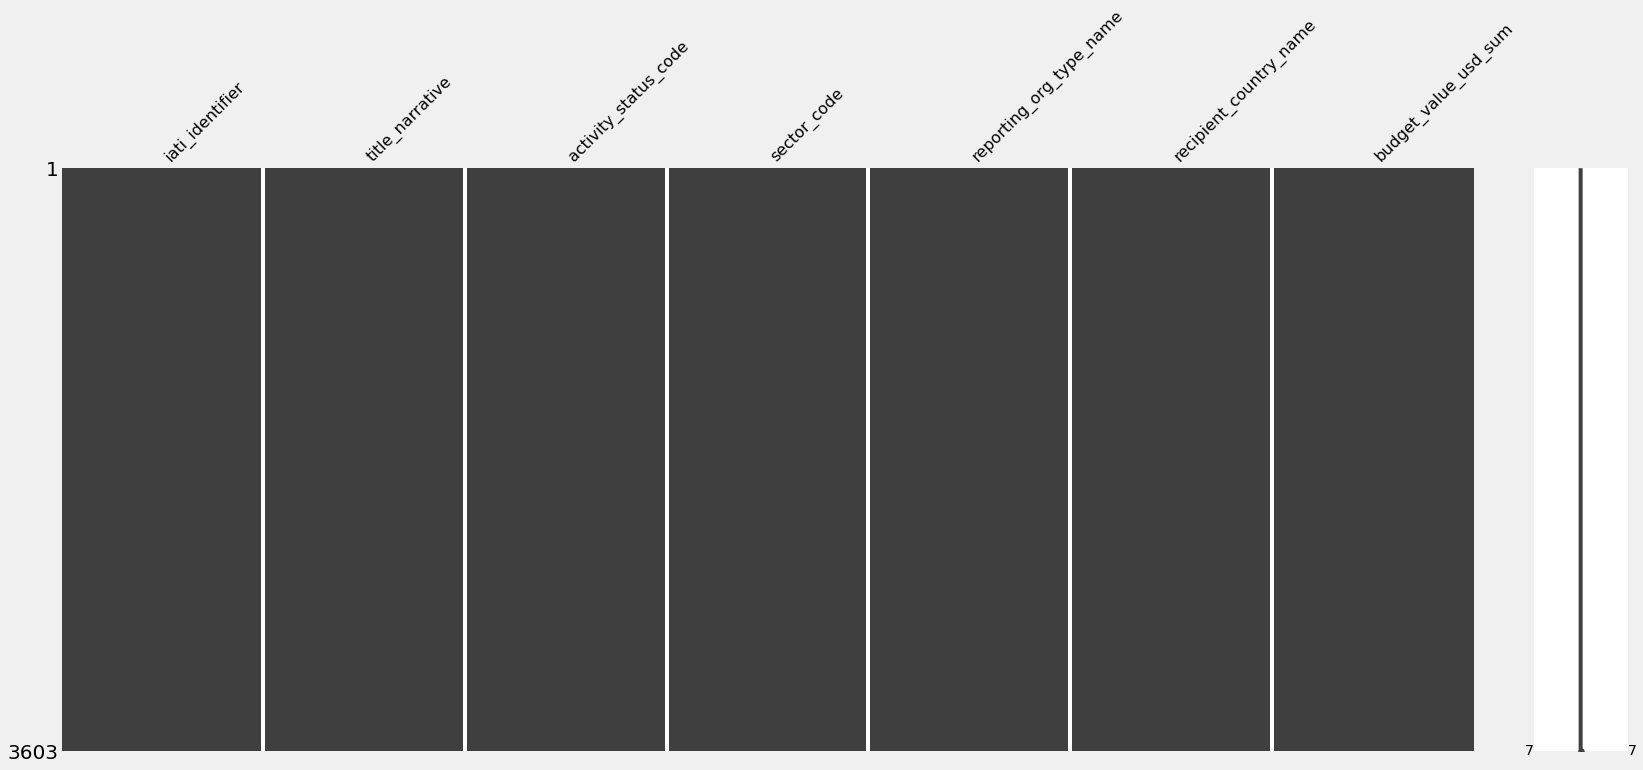

In [49]:
df3.dropna(axis=0, how='any', thresh=None, subset=['recipient_country_name', 'budget_value_usd_sum'], inplace=True)
msno.matrix(df3)

In [50]:
df3.shape

(3603, 7)

We will use multiple linear regression in order to predict the budget value of a project based on its features

## Multiple linear regression

In [51]:
y = df3.budget_value_usd_sum.values

In [52]:
cleaned3 = df3.set_index('iati_identifier').sector_code.str.split(',', expand=True).stack()

In [53]:
cleaned3

iati_identifier          
XI-IATI-WBTF-TF070850  0     73010
                       1     43042
                       2     43040
                       3     32161
                       4     31193
                             ...  
XI-IATI-WBTF-TF072778  6     15112
                       7     14031
                       8     14022
                       9     14010
                       10    13010
Length: 10081, dtype: object

In [54]:
x_data_sector = pd.get_dummies(cleaned3, prefix='dummy', drop_first=True).groupby(level=0).sum()

In [55]:
x_data_sector.head()

,dummy_000014,dummy_000021,dummy_000022,dummy_000023,dummy_000024,dummy_000025,dummy_000026,dummy_000031,dummy_000032,dummy_000033,...,dummy_wa,dummy_wc,dummy_wf,dummy_wz,dummy_ya,dummy_yf,dummy_yh,dummy_yt,dummy_yy,dummy_yz
iati_identifier,,,,,,,,,,,,,,,,,,,,,
44000-P040653,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
44000-P065129,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
44000-P071144,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44000-P073886,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
44000-P074011,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
cleaned_org = df3.set_index('iati_identifier').reporting_org_type_name.str.split(',', expand=True).stack()

In [57]:
x_data_org = pd.get_dummies(cleaned_org, prefix='org', drop_first=True).groupby(level=0).sum()
x_data_org.head()

,org_Government,org_International NGO,org_Multilateral,org_National NGO,org_Other Public Sector,org_Private Sector
iati_identifier,,,,,,
44000-P040653,0,0,1,0,0,0
44000-P065129,0,0,1,0,0,0
44000-P071144,0,0,1,0,0,0
44000-P073886,0,0,1,0,0,0
44000-P074011,0,0,1,0,0,0


In [58]:
target = df3.set_index('iati_identifier').budget_value_usd_sum
target.head()

iati_identifier
XI-IATI-WBTF-TF070850           21300075.00
ES-DIR3-E04585801-009-031721       19190.51
ES-DIR3-E04585801-009-002077       68968.65
ES-DIR3-E04585801-009-001991       46963.25
ES-DIR3-E04585801-009-002079       71340.62
Name: budget_value_usd_sum, dtype: float64

In [59]:
df_reg = pd.concat([x_data_sector,x_data_org, target], axis=1)

In [60]:
df_reg.shape

(3603, 370)

In [61]:
df_reg = df_reg[df_reg['budget_value_usd_sum']>0]
df_reg.shape

(3601, 370)

In [62]:
from scipy import stats
z_scores = stats.zscore(df_reg.iloc[:,369])

In [63]:
df_reg_o= df_reg[(z_scores < 3)]

In [64]:
from sklearn import linear_model

In [65]:
X = df_reg_o.iloc[:, 0:369]

In [66]:
y = df_reg_o.iloc[:, 369]

In [67]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [68]:
predictions = lm.predict(X)

In [69]:
print(predictions[0:5])

[1.24945886e+08 3.69474224e+07 8.15282864e+07 6.78148784e+07
 1.06911198e+08]


In [70]:
lm.score(X,y)

0.838302123944737

As we can observe, the R squared value seems promisory

Now we will use LR and SVC in order to classify if a project is going to be expensive ( using the third quartile budget value as reference) based on its features

## Logistic Regression

In [71]:
df_reg_o['budget_value_usd_sum'].describe()

count    3.556000e+03
mean     4.723614e+06
std      1.766890e+07
min      1.100000e-01
25%      1.859650e+04
50%      1.082103e+05
75%      9.400941e+05
max      2.040000e+08
Name: budget_value_usd_sum, dtype: float64

In [72]:
def imput_label_class(cols):
    budget = cols[0]
    
    if budget>940093:
        return 1
    else:
        return 0
    

In [73]:
df_reg_o['label_class'] = df_reg_o[['budget_value_usd_sum']].apply(imput_label_class, axis=1)

<ipython-input-73-6e6e26a3c82a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg_o['label_class'] = df_reg_o[['budget_value_usd_sum']].apply(imput_label_class, axis=1)


In [74]:
df_reg_o['label_class'].sum()

889

In [75]:
df_reg_o[df_reg_o['label_class']==1].shape

(889, 371)

In [76]:
df_reg_o[df_reg_o['label_class']==0].shape

(2667, 371)

In [77]:
X = df_reg_o.iloc[:, :368]

y = df_reg_o.iloc[:, 370]


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [79]:
logitmodel = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                                intercept_scaling=1, l1_ratio=None, max_iter=100, n_jobs=None, penalty='l2',
                                random_state=0, solver='liblinear', tol=0.0001, verbose=0,warm_start=False)

In [80]:
logitmodel.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [81]:
y_predictions = logitmodel.predict(X_test)

In [82]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       790
           1       0.76      0.57      0.65       277

    accuracy                           0.84      1067
   macro avg       0.81      0.75      0.78      1067
weighted avg       0.84      0.84      0.83      1067



In [83]:
confusion_matrix(y_test, y_predictions)

array([[741,  49],
       [119, 158]], dtype=int64)

## Support Vector Classifiers 

In [84]:
df_reg_o.head()

,dummy_000014,dummy_000021,dummy_000022,dummy_000023,dummy_000024,dummy_000025,dummy_000026,dummy_000031,dummy_000032,dummy_000033,...,dummy_yy,dummy_yz,org_Government,org_International NGO,org_Multilateral,org_National NGO,org_Other Public Sector,org_Private Sector,budget_value_usd_sum,label_class
iati_identifier,,,,,,,,,,,,,,,,,,,,,
44000-P040653,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1.200000e+08,1
44000-P065129,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,3.394087e+07,1
44000-P074011,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,8.210000e+07,1
44000-P079314,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,6.500000e+07,1
44000-P083923,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1.049941e+08,1


In [87]:
X = df_reg_o.iloc[:, :368]

y = df_reg_o.iloc[:, 370]


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [89]:
svc_model = SVC()

In [90]:
svc_model.fit(X_train,y_train)

SVC()

In [91]:
y_svc_predictions = svc_model.predict(X_test)

In [94]:
print(classification_report(y_test, y_svc_predictions))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       790
           1       0.76      0.56      0.64       277

    accuracy                           0.84      1067
   macro avg       0.81      0.75      0.77      1067
weighted avg       0.83      0.84      0.83      1067



In [95]:
confusion_matrix(y_test, y_svc_predictions)

array([[741,  49],
       [123, 154]], dtype=int64)

In [107]:
param_grid = {
    'C': [5,10,15,20,25],
    'gamma': [1,0.2,0.4,0.6,0.8,1.2,1.4]
}

We will use grid search in order to optimize the SVC parameters

In [122]:
grid = GridSearchCV(SVC(probability=True), param_grid, verbose=3)

In [123]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV 1/5] END ...................................C=5, gamma=1; total time=   1.8s
[CV 2/5] END ...................................C=5, gamma=1; total time=   1.7s
[CV 3/5] END ...................................C=5, gamma=1; total time=   1.5s
[CV 4/5] END ...................................C=5, gamma=1; total time=   1.6s
[CV 5/5] END ...................................C=5, gamma=1; total time=   1.7s
[CV 1/5] END .................................C=5, gamma=0.2; total time=   1.5s
[CV 2/5] END .................................C=5, gamma=0.2; total time=   2.5s
[CV 3/5] END .................................C=5, gamma=0.2; total time=   1.6s
[CV 4/5] END .................................C=5, gamma=0.2; total time=   1.6s
[CV 5/5] END .................................C=5, gamma=0.2; total time=   1.6s
[CV 1/5] END .................................C=5, gamma=0.4; total time=   1.5s
[CV 2/5] END .................................C

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [5, 10, 15, 20, 25],
                         'gamma': [1, 0.2, 0.4, 0.6, 0.8, 1.2, 1.4]},
             verbose=3)

In [124]:
grid.best_params_

{'C': 5, 'gamma': 1}

In [125]:
grid.best_estimator_

SVC(C=5, gamma=1, probability=True)

In [126]:
grid_predictions = grid.predict(X_test)

In [127]:
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[731  59]
 [113 164]]


              precision    recall  f1-score   support

           0       0.87      0.93      0.89       790
           1       0.74      0.59      0.66       277

    accuracy                           0.84      1067
   macro avg       0.80      0.76      0.78      1067
weighted avg       0.83      0.84      0.83      1067



## Comparisson between Classificators: SVC and Logistic Regression

In [128]:
import sklearn.metrics as metrics

### SVC

In [129]:
probs = grid.predict_proba(X_test)

In [133]:
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

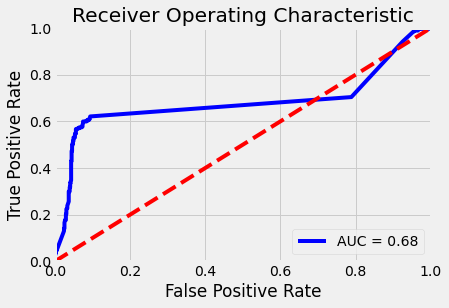

In [134]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Logistic Regression

In [138]:
probs_lr = logitmodel.predict_proba(X_test)

In [141]:
preds = probs_lr[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

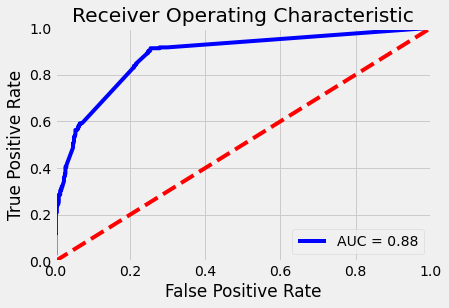

In [142]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In conclussion, based on AUC, the best classifier is Logistic Regression (AUC= 0.88)

Using its corresponing curve, we will find the best threshold so that the recall value will be minimized

In [154]:
threshold

array([1.99809179, 0.99809179, 0.9785256 , 0.97827003, 0.9118627 ,
       0.91075618, 0.86536874, 0.85618065, 0.81691565, 0.81154705,
       0.81127037, 0.80644415, 0.79981966, 0.79940425, 0.78789749,
       0.78675169, 0.77786066, 0.77265362, 0.7720148 , 0.77081918,
       0.73634888, 0.73574981, 0.72850231, 0.72494742, 0.72240892,
       0.71907696, 0.71781323, 0.71000064, 0.70379109, 0.70225984,
       0.69654977, 0.69415852, 0.69104821, 0.68502104, 0.67696859,
       0.65489382, 0.65431867, 0.65230172, 0.64643791, 0.64245964,
       0.63624942, 0.62329042, 0.61245989, 0.60836271, 0.60443289,
       0.60109423, 0.58904606, 0.58269241, 0.5820481 , 0.57972626,
       0.57353065, 0.5721829 , 0.56247305, 0.55791496, 0.5561392 ,
       0.55165105, 0.5370479 , 0.51089553, 0.50191674, 0.50191441,
       0.49858224, 0.49662519, 0.49277535, 0.4851068 , 0.48079273,
       0.4742841 , 0.47300071, 0.4692095 , 0.46432567, 0.45655452,
       0.42603438, 0.42023861, 0.41417735, 0.36637092, 0.34811

In [155]:
tpr

array([0.        , 0.00361011, 0.02888087, 0.02888087, 0.11913357,
       0.11913357, 0.15884477, 0.16606498, 0.19855596, 0.20577617,
       0.20938628, 0.20938628, 0.22382671, 0.23104693, 0.23826715,
       0.23826715, 0.24548736, 0.24548736, 0.24909747, 0.25270758,
       0.27436823, 0.28158845, 0.28519856, 0.28519856, 0.28519856,
       0.29241877, 0.3032491 , 0.3032491 , 0.31046931, 0.31046931,
       0.31768953, 0.32129964, 0.32129964, 0.32490975, 0.34296029,
       0.36101083, 0.36462094, 0.36823105, 0.37545126, 0.37545126,
       0.37906137, 0.38628159, 0.40433213, 0.40433213, 0.41155235,
       0.48736462, 0.50541516, 0.50541516, 0.50902527, 0.51263538,
       0.5234657 , 0.53068592, 0.53429603, 0.53429603, 0.53790614,
       0.54512635, 0.5631769 , 0.5631769 , 0.57039711, 0.57039711,
       0.57761733, 0.57761733, 0.58122744, 0.58122744, 0.58483755,
       0.58483755, 0.58844765, 0.58844765, 0.59205776, 0.59205776,
       0.83032491, 0.83032491, 0.83754513, 0.83754513, 0.84476

In [156]:
fpr

array([0.        , 0.        , 0.        , 0.00126582, 0.00126582,
       0.00253165, 0.00253165, 0.00253165, 0.00253165, 0.00253165,
       0.00253165, 0.00506329, 0.00506329, 0.00506329, 0.00506329,
       0.00632911, 0.00632911, 0.00886076, 0.00886076, 0.01012658,
       0.01012658, 0.01012658, 0.01012658, 0.01139241, 0.01392405,
       0.01392405, 0.01392405, 0.0164557 , 0.0164557 , 0.01772152,
       0.01772152, 0.01898734, 0.02025316, 0.02025316, 0.02405063,
       0.02405063, 0.02658228, 0.02658228, 0.02658228, 0.0278481 ,
       0.0278481 , 0.0278481 , 0.0278481 , 0.03037975, 0.03037975,
       0.04810127, 0.04810127, 0.04936709, 0.04936709, 0.05063291,
       0.05063291, 0.05063291, 0.05063291, 0.05316456, 0.05316456,
       0.05443038, 0.05443038, 0.05949367, 0.06075949, 0.06202532,
       0.06202532, 0.06329114, 0.06329114, 0.06455696, 0.06455696,
       0.06582278, 0.06582278, 0.06708861, 0.06708861, 0.0721519 ,
       0.20886076, 0.21012658, 0.21012658, 0.21265823, 0.21518

The threshold found was 0.05

In [157]:
y_pred_new_threshold = (logitmodel.predict_proba(X_test)[:,1]>=0.05).astype(int)

In [158]:
print(confusion_matrix(y_test,y_pred_new_threshold))
print('\n')
print(classification_report(y_test,y_pred_new_threshold))

[[554 236]
 [ 23 254]]


              precision    recall  f1-score   support

           0       0.96      0.70      0.81       790
           1       0.52      0.92      0.66       277

    accuracy                           0.76      1067
   macro avg       0.74      0.81      0.74      1067
weighted avg       0.85      0.76      0.77      1067



We have achieved to increase the recall which means to increase the true positive rate and consequently to diminish the False Negatives rate which is desireable in order to classify correclty projects as expensive or not based on its features 